In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Spotify dataset
df = pd.read_csv('Resources/spotify_songs.csv')
# Drop duplicated tracks
df = df.drop_duplicates(subset=['track_id', 'track_name'])
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [3]:
len(df.index)

28356

In [4]:
# Only select columns with numerical values that will be used
df_spotify = df.drop(columns=['track_id', 'track_album_release_date', 'playlist_genre', 'track_name', 'track_artist', 'track_album_id', 'playlist_subgenre', 'track_album_name', 'playlist_name', 'playlist_id', 'mode'])
df_spotify.head()

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
# Drop tracks that do not have any track popularity
df_clean = df_spotify.loc[df['track_popularity']!=0]

In [6]:
df_clean['track_popularity'].describe()

count    25736.000000
mean        43.333657
std         21.106592
min          1.000000
25%         29.000000
50%         45.000000
75%         59.000000
max        100.000000
Name: track_popularity, dtype: float64

Based on the distribution, we made 4 tiers of track_popularity.

0 ~ 31 : Not Popular

31 ~ 48 : Neutral

48 ~ 63 : Popular

63 ~ 100 : Very Popular


In [7]:
# Divide track_popularity values into bins
bins = [0, 31, 48, 63, 100]
labels = ['not popular', 'neutral', 'popular', 'very popular']

# Assign new column named "tier" for the binned values
df_clean.loc[:,'tier'] = pd.cut(df_clean['track_popularity'], bins=bins, labels=labels)
df_clean.head()

/var/folders/8h/0fc9srz149dfqnlj45yklnpc0000gn/T/ipykernel_34305/2504867880.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'tier'] = pd.cut(df_clean['track_popularity'], bins=bins, labels=labels)


,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,tier
0,66,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,very popular
1,67,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,very popular
2,70,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,very popular
3,60,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,popular
4,69,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,very popular


In [8]:
# Select "tier" column as our target
X = df_clean[['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
y = df_clean['tier']

In [9]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Use label encoder for categorial value
encoder = LabelEncoder()
X_train['key'] = encoder.fit_transform(X_train['key'])
X_test['key'] = encoder.transform(X_test['key'])

# Scale the data using StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Create model and fit our data
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
# Predict the data
kn_preds = kn_model.predict(X_test_scaled)

# Check accuracy score
kn_acc_score = accuracy_score(y_test, kn_preds)
print(f"KNeighborsClassifier accuracy score is {kn_acc_score}.")

KNeighborsClassifier accuracy score is 0.29950264221324213.


### 2. RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create model and fit our data
rfc_model = RandomForestClassifier(n_estimators=128, class_weight='balanced', random_state=42)
rfc_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=128,
                       random_state=42)

In [13]:
# Predict the data
rfc_preds = rfc_model.predict(X_test_scaled)

# Check accuracy score
rfc_acc_score = accuracy_score(y_test, rfc_preds)
print(f"RandomForestClassifier accuracy score is {rfc_acc_score}.")

RandomForestClassifier accuracy score is 0.314112527199254.


### 3. SVM

In [14]:
from sklearn.svm import SVC

# Create model and fit our data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
# Predict the data
svm_preds = svm_model.predict(X_test_scaled)

# Check accuracy score
svm_acc_score = accuracy_score(y_test, svm_preds)
print(f"SVM accuracy score is {svm_acc_score}.")

SVM accuracy score is 0.31333540565744483.


### 4. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# Create model and fit our data
lg_model = LogisticRegression(random_state=42, max_iter=120)
lg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=120, random_state=42)

In [17]:
# Predict the data
lg_preds = lg_model.predict(X_test_scaled)

# Check accuracy score
lg_acc_score = accuracy_score(y_test, lg_preds)
print(f"Logistic Regression accuracy score is {lg_acc_score}.")

Logistic Regression accuracy score is 0.3165993161330432.


### RandomForestClassifier has the highest accuracy score.

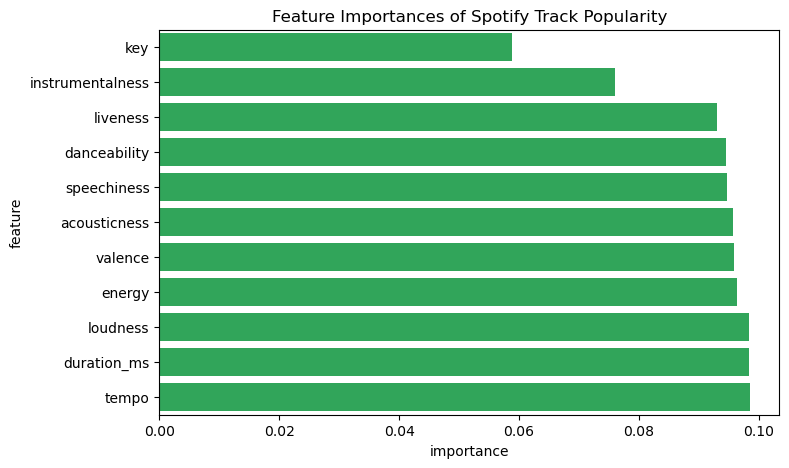

In [18]:
# Check feature importances using the RandomForestClassifier model
df_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rfc_model.feature_importances_
})
df_importances = df_importances.sort_values(by='importance')

# Plot the importances as a bar graph
plt.figure(figsize=(8, 5))
sns.barplot(data=df_importances, x='importance', y='feature', color='#1DB954')
plt.title('Feature Importances of Spotify Track Popularity')
plt.show()

In [19]:
new_track = pd.DataFrame([{
    "danceability": 0.6,
    "energy": 0.6,
    "key": 5,
    "loudness": -3,
    "speechiness": 0.1,
    "acousticness": 0,
    "instrumentalness": 0,
    "liveness": 0.4,
    "valence": 0.1,
    "tempo": 110,
    "duration_ms": 180000,
}])

# Use label encoder for the 'key' value
new_track['key'] = encoder.transform(new_track['key'])

# Scale the new track's data
new_track_scaled = scaler.transform(new_track)

# Predict the tier for new track
new_track_predicted = rfc_model.predict(new_track_scaled)
print(f"New track is predicted to be {new_track_predicted[0]}.")


New track is predicted to be popular.
